# Notebook for documenting and providing examples for using the functions in the PandemiXModelFunctions.py module

In [4]:
# Import scripts
import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf
import PandemiXModelFunctions as pmf

# Load numpy and pyplot, and set some pyplot-preferences
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }

In [5]:
# Reload package, in case anything has changed since kernel was started
import importlib 
importlib.reload(pmf)

<module 'PandemiXModelFunctions' from 'c:\\Users\\rakrpe\\OneDrive - Roskilde Universitet\\Documents\\PandemiX\\GithubRepos\\PandemiX\\modelling\\PandemiXModelFunctions.py'>

# Basic functionality:

In [15]:
## Define a modelling scheme
# Model-name is used to get both differential equations and meta-information (Variable and parameter-names)
# List of models available with pmf.getAvailableModels()
print(pmf.getAvailableModels())
ModelName = 'SIR'

# For meta-information about model, pmf.getModel(ModelName) can be used
_,curMeta = pmf.getModel(ModelName)
print(f'Variable names: {curMeta[0]}, parameter names: {curMeta[1]}')

# Initial conditions can be defined as either a dict or an array (array order as variable-meta list).
# If values are missing from dict, they are assumed as zero
InitialConditions = {'S':0.99,'I':0.01}

# Similar for parameters: Dict or array
Parameters = {'beta': 0.3, 'gamma': 0.15}

# First and last time-point to simulate
tStart = 0
tEnd = 50

['SIR', 'SIHR', 'SIYR', 'SVIYRR', 'OmikronDeltaFull']
Variable names: ['S', 'I'], parameter names: ['beta', 'gamma']


In [17]:
# Create the Scheme object
curScheme = pmf.Scheme(ModelName=ModelName,InitialConditions=InitialConditions,Parameters=Parameters,tStart=tStart,tEnd=tEnd)

# Printing the scheme provides are readable description of the scheme
print(curScheme)

-------
Model: SIR.
Complete simulation running from t=0 until t=50
Initial conditions: {'S': 0.99, 'I': 0.01}
Parameters: {'beta': 0.3, 'gamma': 0.15}


In [29]:
# Simulate the scheme using the simulate function
curScheme.simulate()
# For higher time-resolution, the flag tRes can be set (default: 100)
curScheme.simulate(tRes=1000)

# Results are saved in the "result" attribute
curScheme.result

# The result-object has attributes 
# "t", the time as a 1D array, 
# "y", variables representented as matrix
# and additionally individual variables as 1D arrays.
plt.figure() 
plt.plot(curScheme.result.t,curScheme.result.S)
plt.plot(curScheme.result.t,curScheme.result.I)
plt.show()

(<Figure size 864x576 with 2 Axes>,
 array([<AxesSubplot:ylabel='S'>, <AxesSubplot:ylabel='I'>], dtype=object))

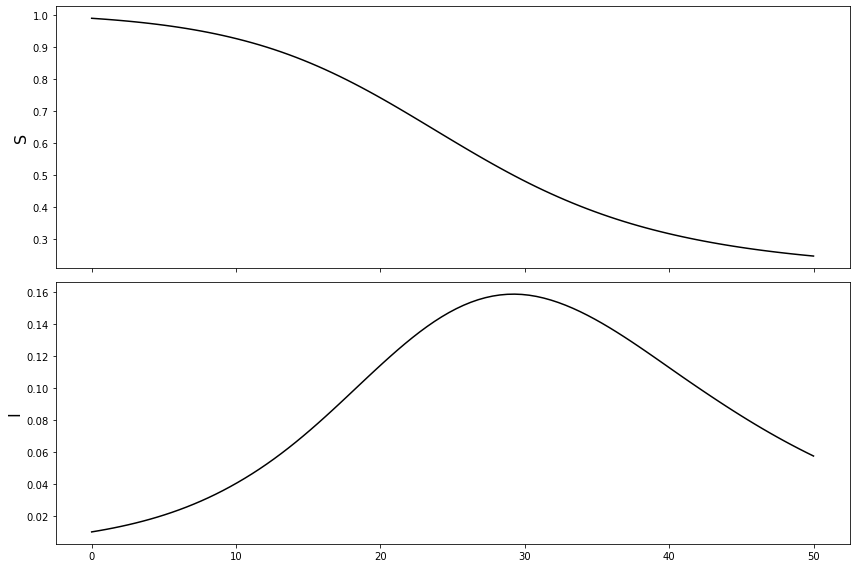

In [31]:
# In addition, a quick "plot()" function is included
curScheme.plot() 
# If simulation has not already been run, plot() firsts runs simulation

# Additional features of the plot() function to be described later

# Adding changes at given time-point